In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [42]:
properties_t=properties.transpose()
properties_t=properties_t.reset_index()
properties_t.columns=properties_t.iloc[0]
properties_t = properties_t.rename(columns={'Unnamed: 0':'London Borough',pd.NaT:'ID'})
properties_t = properties_t.drop([0])


In [43]:
clean_properties=pd.melt(properties_t, id_vars=['London Borough', 'ID'], var_name='Month', value_name='Average_price')
clean_properties['Average_price']=pd.to_numeric(clean_properties['Average_price'])

In [44]:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']
clean_properties=clean_properties[~clean_properties['London Borough'].isin (nonBoroughs)]
df=clean_properties.copy()

# Trend of average price of boroughs in the last decade

[]

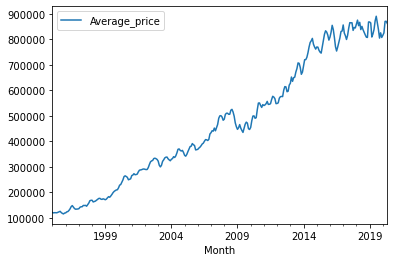

In [45]:
df[df['London Borough'] =='Camden'].plot(x='Month', y='Average_price')
plt.plot()

In [46]:
df['Year'] = df['Month'].apply(lambda t:t.year)
def create_price_ratio(dfg):
    avg_1998=dfg[dfg['Year']==1998].Average_price.mean()
    avg_2018=dfg[dfg['Year']==2018].Average_price.mean()
    return avg_1998/avg_2018


uniq_borough= df['London Borough'].unique()
price_ratio = {}

for borough in uniq_borough:
    price_ratio[borough]=create_price_ratio(df[df['London Borough']==borough])
                        
print(price_ratio)    
    

{'City of London': 0.18862157770244367, 'Barking & Dagenham': 0.20422256235393685, 'Barnet': 0.22945274120785797, 'Bexley': 0.2353507654063011, 'Brent': 0.2043086864360114, 'Bromley': 0.24421308489837312, 'Camden': 0.20261973503252542, 'Croydon': 0.23803288028014047, 'Ealing': 0.23194048191708755, 'Enfield': 0.23455064269011863, 'Greenwich': 0.20995010893854218, 'Hackney': 0.16133493530705734, 'Hammersmith & Fulham': 0.24167443054605853, 'Haringey': 0.19475619095546956, 'Harrow': 0.24635417785626296, 'Havering': 0.23120155787014757, 'Hillingdon': 0.23807975835429931, 'Hounslow': 0.25148317824115635, 'Islington': 0.20643891170300285, 'Kensington & Chelsea': 0.19675491852791563, 'Kingston upon Thames': 0.23416190234282552, 'Lambeth': 0.20170435486140822, 'Lewisham': 0.1835124676472171, 'Merton': 0.21091380604361798, 'Newham': 0.18848754146121072, 'Redbridge': 0.2236545053715767, 'Richmond upon Thames': 0.24967779731157863, 'Southwark': 0.18127484171283462, 'Sutton': 0.24280551426824518, 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


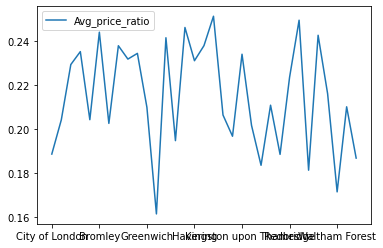

In [47]:
boroughs=pd.DataFrame(price_ratio, index=[0])
boroughs_t=boroughs.transpose()
boroughs_t.columns=['Avg_price_ratio']

boroughs_t.plot()
plt.show()

In [48]:
df.head()

,London Borough,ID,Month,Average_price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995


In [49]:
df[df['Average_price'] == df['Average_price'].max()]

,London Borough,ID,Month,Average_price,Year
13267,Kensington & Chelsea,E09000020,2018-01-01,1463377.921,2018


In [50]:
df[df['Average_price'] == df['Average_price'].min()]

,London Borough,ID,Month,Average_price,Year
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266,1995


In [35]:
boroughs_t.head()

,Avg_price_ratio
City of London,0.188622
Barking & Dagenham,0.204223
Barnet,0.229453
Bexley,0.235351
Brent,0.204309


In [39]:
boroughs_t[boroughs_t['Avg_price_ratio'] == boroughs_t['Avg_price_ratio'].max()]

,Avg_price_ratio
Hounslow,0.251483


# Conclusion

The average price of the housing in boroughs has been increasing in the last decade.
Also the ratio of all broughs lies between 0.16 abd 0.24.
Hounslow has the highest average price ratio. 
Kensington & Chelsea is the most expensive borough.
Barking & Dagenham is the least exepnsive borough.
